In [2]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
dataset = pd.read_csv("ifood_df.csv")
dataset.head()



Products = dataset[["MntFishProducts","MntSweetProducts","MntWines","MntFruits","MntMeatProducts","MntGoldProds"]]
target = dataset["Income"]


X = sm.add_constant(Products)


model = sm.OLS(target, X).fit()


results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     795.7
Date:                Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:18:44   Log-Likelihood:                -23770.
No. Observations:                2205   AIC:                         4.755e+04
Df Residuals:                    2198   BIC:                         4.759e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.447e+04    366.178  

# Рассчитываем сводную статистику (среднее, медиана, стандартное отклонение) для всех числовых столбцов

In [12]:

mean_values = dataset.mean()
median_values = dataset.median()

std_dev_values = dataset.std()


summary_stats = pd.DataFrame({
    'среднее значение': mean_values,
    'Медиана': median_values,
    'Стандартное отклонение': std_dev_values
})


summary_stats




,Mean,Median,Standard Deviation
Income,51622.094785,51287.0,20713.063826
Kidhome,0.442177,0.0,0.537132
Teenhome,0.506576,0.0,0.544380
Recency,49.009070,49.0,28.932111
MntWines,306.164626,178.0,337.493839
MntFruits,26.403175,8.0,39.784484
MntMeatProducts,165.312018,68.0,217.784507
MntFishProducts,37.756463,12.0,54.824635
MntSweetProducts,27.128345,8.0,41.130468
MntGoldProds,44.057143,25.0,51.736211


# Визуализируем распределение доходов с помощью гистограмм.

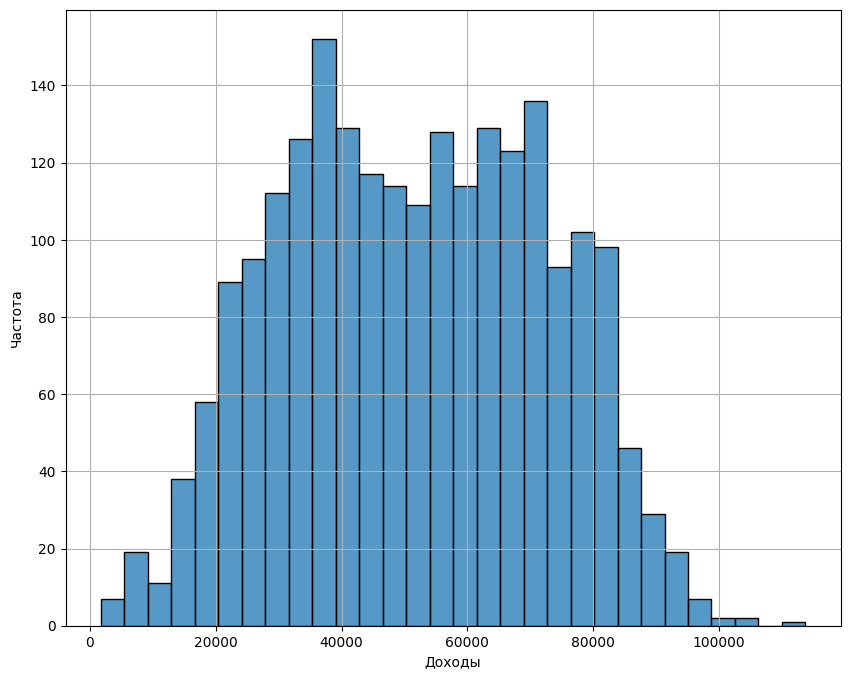

In [18]:
plt.figure(figsize=(10,8))

sns.histplot(dataset["Income"],bins=30,)
plt.xlabel('Доходы')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Кластеризируем методом K-средних для сегментации клиентов на основе их покупательских привычек.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


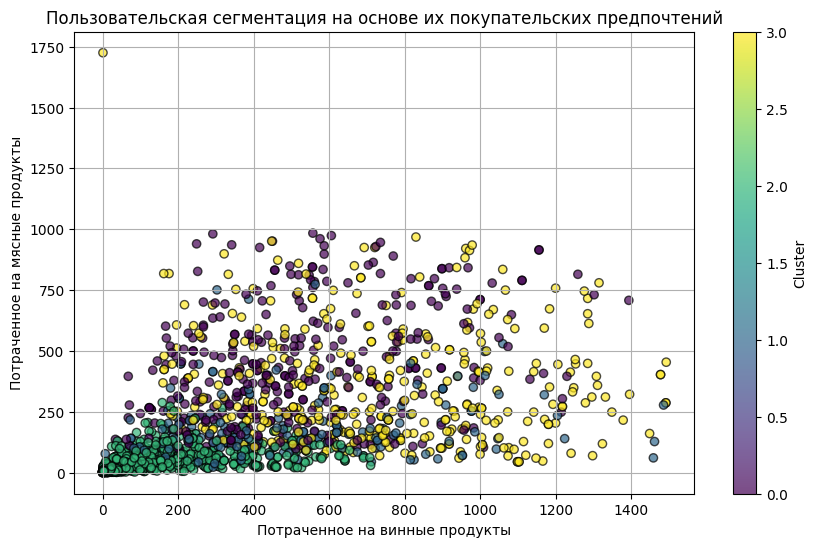

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset[features])

kmeans = KMeans(n_clusters=4, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(scaled_data)


plt.figure(figsize=(10, 6))
plt.scatter(dataset['MntWines'], dataset['MntMeatProducts'], c=dataset['Cluster'], cmap='viridis', edgecolor='black', alpha=0.7)
plt.title('Пользовательская сегментация на основе их покупательских предпочтений')
plt.xlabel('Потраченное на винные продукты')
plt.ylabel('Потраченное на мясные продукты')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()



# **CLV**

In [27]:

dataset['CLV'] = dataset[features].sum(axis=1)


quantiles = dataset['CLV'].quantile([0.33, 0.66])


def assign_clv_level(clv, quantiles):
    if clv <= quantiles[0.33]:
        return 'Low'
    elif clv <= quantiles[0.66]:
        return 'Medium'
    else:
        return 'High'


dataset['CLV_Level'] = dataset['CLV'].apply(assign_clv_level, args=(quantiles,))

clv_analysis = dataset.groupby('CLV_Level').mean()



clv_analysis


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Cluster,CLV
CLV_Level,,,,,,,,,,,,,,,,,,,,,
High,72622.342667,0.065333,0.394667,50.161333,671.153333,58.222667,391.358667,83.876000,59.973333,78.172000,...,0.074667,0.001333,0.526667,0.158667,0.238667,1264.584000,1186.412000,0.632000,1.480000,1342.756000
Low,31127.548077,0.854396,0.429945,48.541209,17.644231,3.258242,12.009615,4.754121,3.395604,9.876374,...,0.116758,0.068681,0.486264,0.146978,0.181319,41.061813,31.185440,0.083791,2.000000,50.938187
Medium,50480.202201,0.418157,0.698762,48.288858,218.546080,16.753783,85.627235,23.225585,17.009629,43.090784,...,0.078404,0.004127,0.500688,0.189821,0.226960,361.162311,318.071527,0.171939,1.844567,404.253095
